In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

In [43]:
columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [44]:
data=pd.read_csv('processed.cleveland.data',header=None,names=columns,na_values='?')

In [45]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [46]:
data.shape

(303, 14)

In [47]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [49]:
data=data.dropna()

In [53]:
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)


In [54]:
X=data.drop('num',axis=1)
Y=data['num']

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [64]:
numeric = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [68]:
preprocessor=ColumnTransformer(
    transformers=[('num',StandardScaler(),numeric)]
)

In [69]:
pipe=Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000))
])

In [70]:
pipe.fit(X_train,Y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
Y_pred=pipe.predict(X_test)

In [76]:
print("accuracy_score",accuracy_score(Y_pred,Y_test))
print("clasification report\n",classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))

accuracy_score 0.8666666666666667
clasification report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

[[32  4]
 [ 4 20]]


roc_auc_score: 0.9421296296296298


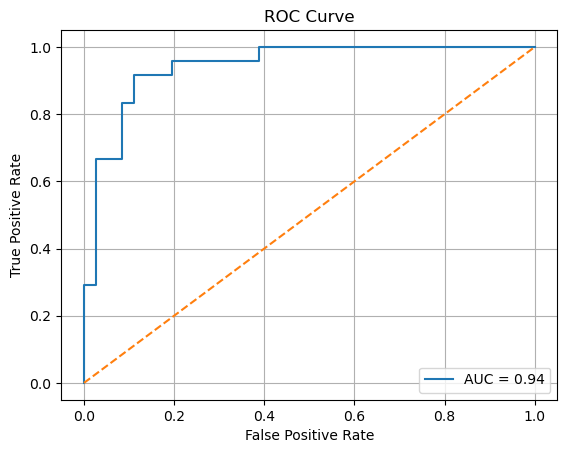

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc = roc_auc_score(Y_test, y_prob)
print("roc_auc_score:",auc)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
